In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [4]:
stock_df = pd.read_csv("stock_sentiment.csv")

In [5]:
stock_df

Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...          0
5787  #Gold prices slip below Rs 46,000 as #investor...          0
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [7]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [10]:
Test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

In [11]:
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [12]:
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [13]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [14]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [15]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

In [16]:
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\DEEPA
[nltk_data]     HEGDE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [18]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [19]:
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [20]:
stock_df['Text'][0]
stock_df['Text Without Punc & Stopwords'][0]
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, feageed, indicator, trades, aw...  
2     [afraid, short, amzn, looking, like, nearmonop...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 4 columns]

In [21]:
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

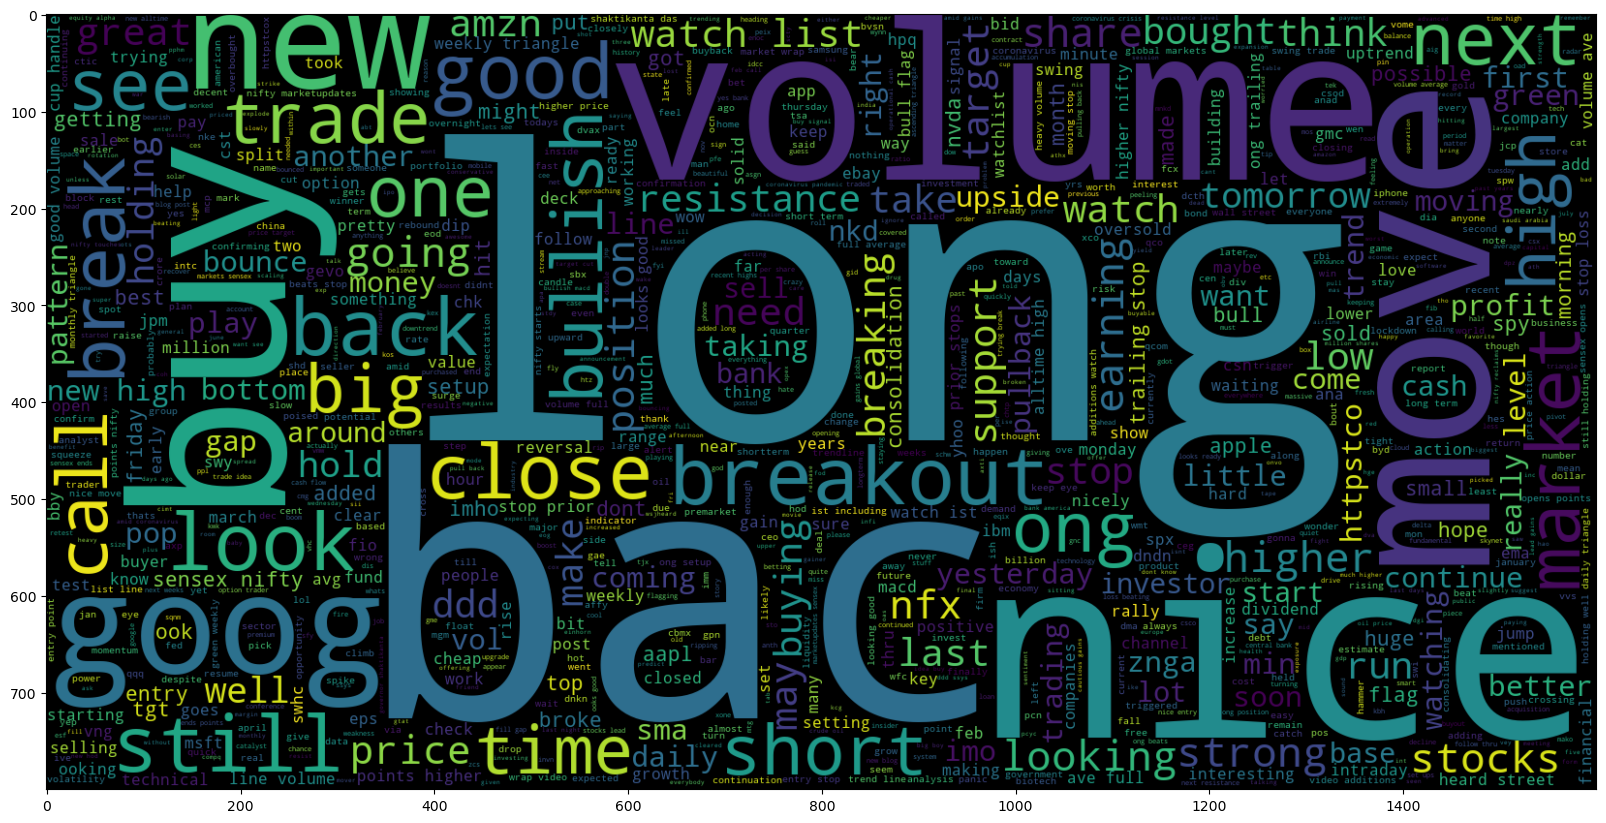

In [22]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [23]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [afraid, short, amzn, looking, like, nearmonop...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

                   Text Without Punc & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DEEPA
[nltk_data]     HEGDE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [26]:
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [27]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [28]:
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

In [29]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [afraid, short, amzn, looking, like, nearmonop...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

                   Text Without Punc & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

In [30]:
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [31]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [32]:
total_words = len(list(set(list_of_words)))
total_words

9268

In [34]:
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [35]:
X_train.shape
X_test.shape
X_train

4295        [got, looks, good, favor, many, like, target]
2568                          [sbx, gap, closethat, fast]
4723               [gid, still, acting, well, stop, rest]
4307    [anf, weekly, kumo, note, volume, macd, trying...
4111    [mdx, nice, setup, multiple, timeframes, needs...
                              ...                        
2330           [bac, breaking, suggest, ong, hold, close]
362                                    [wfm, short, back]
2641                           [bac, stop, loss, beating]
637                  [green, weekly, triangle, dnpdating]
1098    [aapl, aside, simply, levering, common, writin...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [36]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [37]:
train_sequences
test_sequences
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 2568    [sbx, gap, closethat, fast]
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [426, 55, 3634, 301]


C:\Users\DEEPA HEGDE\AppData\Local\Temp\ipykernel_12448\3838874616.py:3: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [38]:
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [39]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [ 165   36    5 1516  157    3   37    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [ 426   55 3634  301    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [1117   10  701   65    7  384    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [40]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [41]:
y_train_cat.shape

(5211, 2)

In [42]:
y_test_cat.shape

(580, 2)

In [43]:
y_train_cat

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [44]:
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [45]:
# Sequential Model
model = Sequential()

model.add(Embedding(total_words, output_dim = 512))

# RNN and LSTM
model.add(LSTM(256))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4745216   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 16s 86ms/step - loss: 0.5761 - acc: 0.7054 - val_loss: 0.5160 - val_acc: 0.7488
Epoch 2/2
131/131 [==============================] - 10s 77ms/step - loss: 0.3153 - acc: 0.8728 - val_loss: 0.5983 - val_acc: 0.7689


In [47]:
pred = model.predict(padded_test)

19/19 [==============================] - 1s 13ms/step


In [48]:
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [49]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.6706896551724137

<AxesSubplot: >

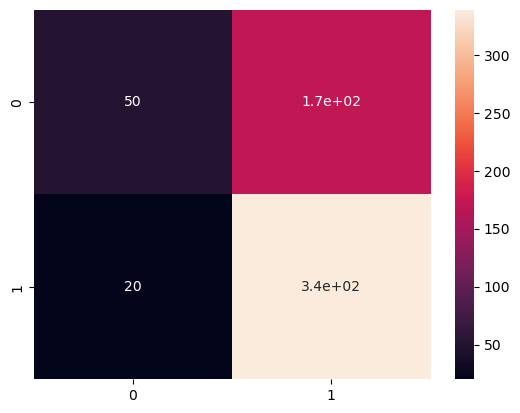

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)